hello world here we will import the packages

In [17]:
import numpy as np
import pandas as pd
import pybaseball as pyb
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotly.tools import mpl_to_plotly as ggplotly
from dash import Dash, html, dash_table, dcc, Input, Output
import warnings

warnings.filterwarnings('ignore')


now we will import data from the pybaseball package and make a simple graph 

In [18]:
pitches = pyb.statcast('2024-10-3')

This is a large query, it may take a moment to complete


100%|██████████| 1/1 [00:00<00:00,  4.75it/s]


Here we will export to excel in order to just get a better look at the data. also will describe data

In [19]:
print('Our Dataset has {0} Pitches'.format(len(pitches)))
print(pitches.describe())
# pitches.to_excel("last_brewers.xlsx")

Our Dataset has 289 Pitches
                 game_date  release_speed  release_pos_x  release_pos_z  \
count                  289          289.0          289.0          289.0   
mean   2024-10-03 00:00:00      89.912457      -0.367716       5.550796   
min    2024-10-03 00:00:00           75.8          -2.87           4.58   
25%    2024-10-03 00:00:00           86.1          -2.27           5.23   
50%    2024-10-03 00:00:00           90.5          -0.95           5.64   
75%    2024-10-03 00:00:00           94.8           2.16           5.88   
max    2024-10-03 00:00:00           99.8           2.34           6.59   
std                    NaN       5.830218       1.982541       0.420488   

             batter        pitcher  spin_dir  spin_rate_deprecated  \
count         289.0          289.0       0.0                   0.0   
mean   637771.49827  603670.695502      <NA>                  <NA>   
min        516782.0       500779.0      <NA>                  <NA>   
25%        60704

Next we will use the python version of ggplot to make simple plots

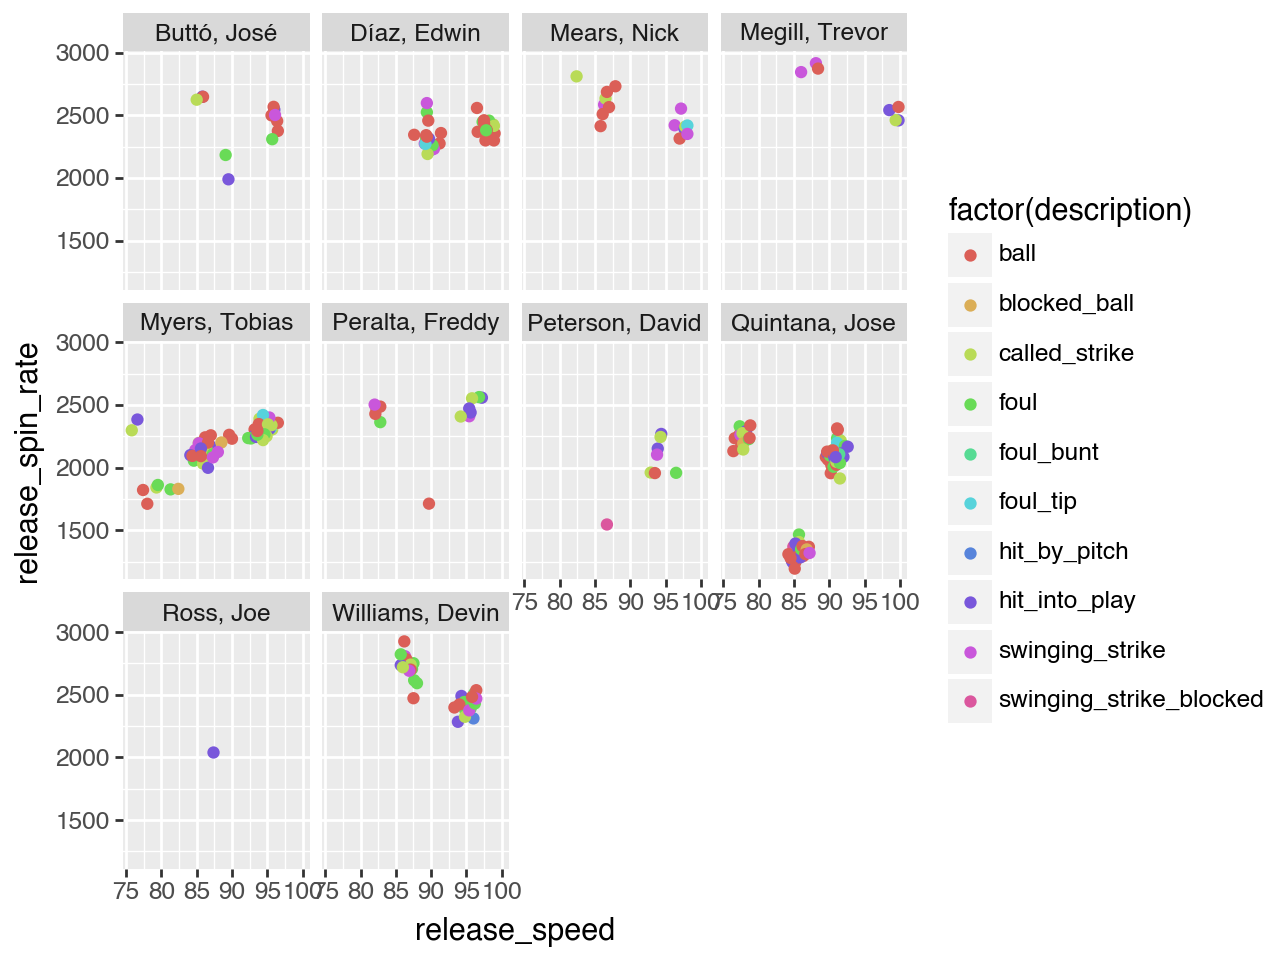

In [20]:
(
    ggplot(pitches, aes("release_speed", "release_spin_rate", color = "factor(description)"))
    + geom_point()
    + facet_wrap("player_name")
)

Adding some WAR stats... from Andrew

In [21]:
# Fetch team batting WAR for the 2023 season
team_batting_war_2023 = pyb.team_batting(2023)
brewers_batting_war_2023 = team_batting_war_2023[team_batting_war_2023['Team'] == 'MIL']

# Fetch team pitching WAR for the 2023 season
team_pitching_war_2023 = pyb.team_pitching(2023)
brewers_pitching_war_2023 = team_pitching_war_2023[team_pitching_war_2023['Team'] == 'MIL']

# Display the Brewers' batting and pitching WAR for 2023
print("Brewers Batting WAR for 2023:")
print(brewers_batting_war_2023[['Team', 'WAR']])

print("\nBrewers Pitching WAR for 2023:")
print(brewers_pitching_war_2023[['Team', 'WAR']])


Brewers Batting WAR for 2023:
   Team   WAR
21  MIL  18.5

Brewers Pitching WAR for 2023:
  Team   WAR
0  MIL  16.0


Now do a simple app thing allowing to select a pitcher etc.

In [22]:
pitches = pyb.statcast('2024-10-3')


# Dropdown menu to select a pitcher to plot
pitchers = pitches['player_name'].unique()
app = Dash()
# app.run(jupyter_mode="external")
app.layout = html.Div([
    dcc.Dropdown(options = pitchers, value = 'Williams, Devin', id = 'pitcher-dropdown'),
    dcc.Graph(id='asdf')
])

#here we have a function that creates the graph using the input from drop down
@callback(
    Output(component_id='asdf', component_property='figure'),
    Input('pitcher-dropdown', 'value')
)

def update_asdf(selected_pitcher):
    filtered_df = pitches[pitches['player_name'] == selected_pitcher]
    gg = ggplot(filtered_df, aes("release_speed", "release_spin_rate", color = "factor(description)")) + geom_point()
    fig = ggplotly(gg.draw())
    return(fig)

if __name__ == '__main__':
    app.run(debug=True)


This is a large query, it may take a moment to complete


100%|██████████| 1/1 [00:00<00:00,  4.75it/s]
